In [1]:
#imported required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from numpy import math

In [2]:
data = pd.read_csv('/content/50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#features
x = data.iloc[:,:-1].values
#label
y = data.iloc[:,1].values

In [6]:
x


array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [7]:
y

array([136897.8 , 151377.59, 101145.55, 118671.85,  91391.77,  99814.71,
       147198.87, 145530.06, 148718.95, 108679.17, 110594.11,  91790.61,
       127320.38, 135495.07, 156547.42, 122616.84, 121597.55, 145077.58,
       114175.79, 153514.11, 113867.3 , 153773.43, 122782.75, 105751.03,
        99281.34, 139553.16, 144135.98, 127864.55, 182645.56, 153032.06,
       115641.28, 152701.92, 129219.61, 103057.49, 157693.92,  85047.44,
       127056.21,  51283.14,  65947.93,  82982.09, 118546.05,  84710.77,
        96189.63, 127382.3 , 154806.14, 124153.04, 115816.21, 135426.92,
        51743.15, 116983.8 ])

In [8]:
#create dummy variables for the categorical value state
data['NewYork_State'] = np.where(data['State'] == 'New York', 1, 0)         #where we find newyork then replace with 1 or if not found then 0
data['California_State'] = np.where(data['State'] == 'California', 1, 0)    #where we find california then replace with 1 or if not found then 0
data['Florida_State'] = np.where(data['State'] == 'Florida', 1, 0)          #where we find florida then replace with 1 or if not found then 0

#drop the original column state from the dataframe
data.drop(columns=['State'], axis = 1, inplace = True)



In [9]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [10]:
dependent_variable = 'Profit'

In [11]:
#create a list of independent variables
independent_variables = data.columns.tolist()


In [12]:
independent_variables.remove(dependent_variable)


In [13]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'California_State',
 'Florida_State']

In [14]:
#create the data of indpendent variables
x = data[independent_variables].values

#create the  data of dependent variables
y = data[dependent_variable].values

In [15]:
#sampling the dataset
#normally 20% dataset is used for testing and 80% is used for training --> test_size=0.2 means 20%  
#Training set will be used to train the model
#Creating Training and Testing sets
# Testing set will be used to test our model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y ,test_size=0.2,random_state=0)
         

In [16]:
#Transforming the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
X_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 1.        , 0.        ,
        0.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.2807759 , 1.        , 0.44680961, 0.        , 1.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 0.        ,
        1.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 0.        ,
        1.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        , 0.        ,
        0.        ],
       [0.00327821, 0.00432296, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.95618996, 0.22709197, 1.        , 0.        ,
        0.        ]])

In [18]:
#Creating Model Using Sklearn.Inear_model Multiple LinearRegression
from sklearn.linear_model import LinearRegression
regression= LinearRegression()
regression.fit(X_train, y_train)
#predicting the test set results
y_pred = regression.predict(X_test)

In [19]:
#math.sqrt(mean_squared_error(y_test, y_pred))

15023.010725678325

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
# Difference between Actual Data and Own Predicted Data
df 

,Actual,Predicted
0,103282.38,92389.549344
1,144259.40,130971.592631
2,146121.95,130655.716272
3,77798.83,55320.614032
4,191050.39,189500.948489
5,105008.31,110917.106654
6,81229.06,50182.723292
7,97483.56,86814.554543
8,110352.25,108223.845182
9,166187.94,176070.596275


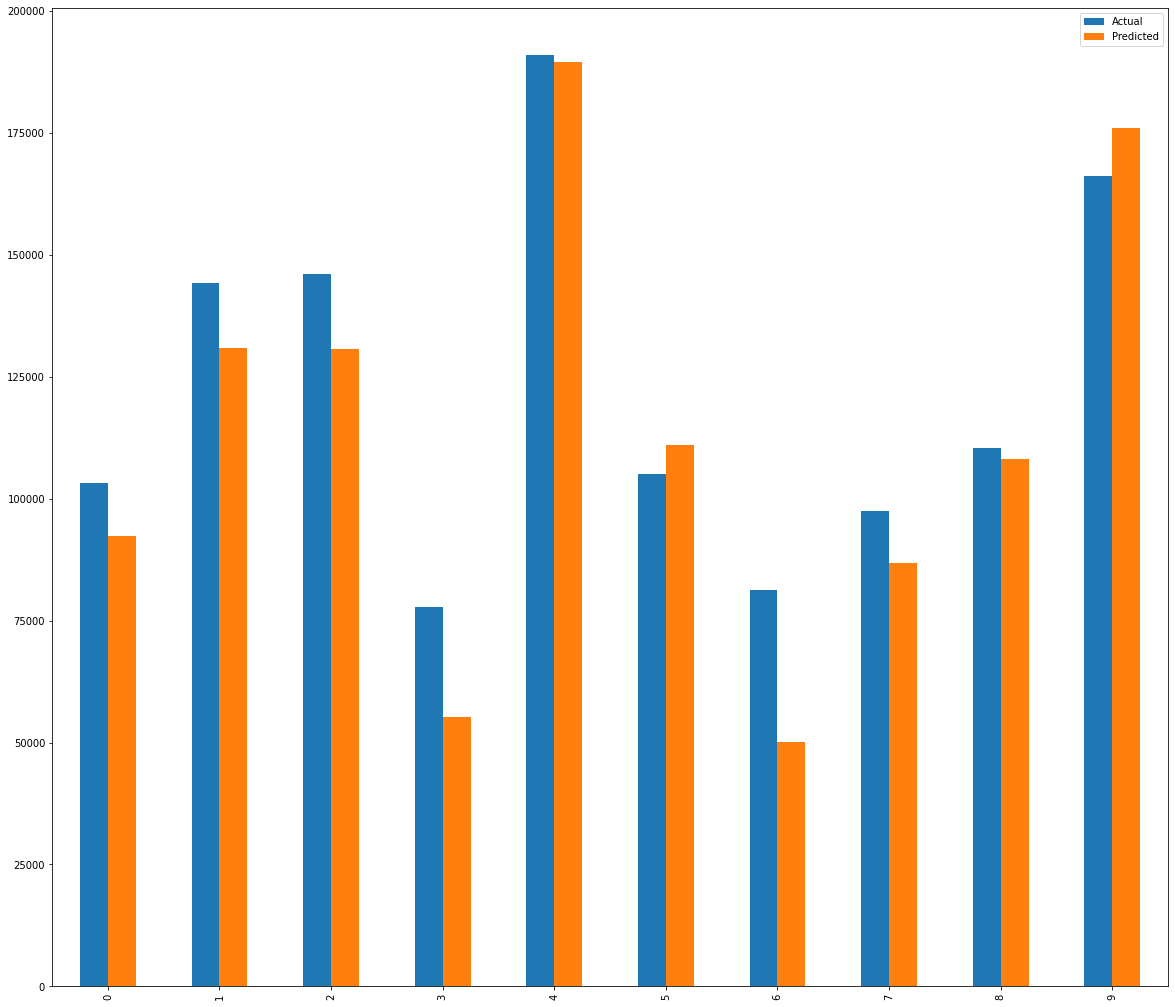

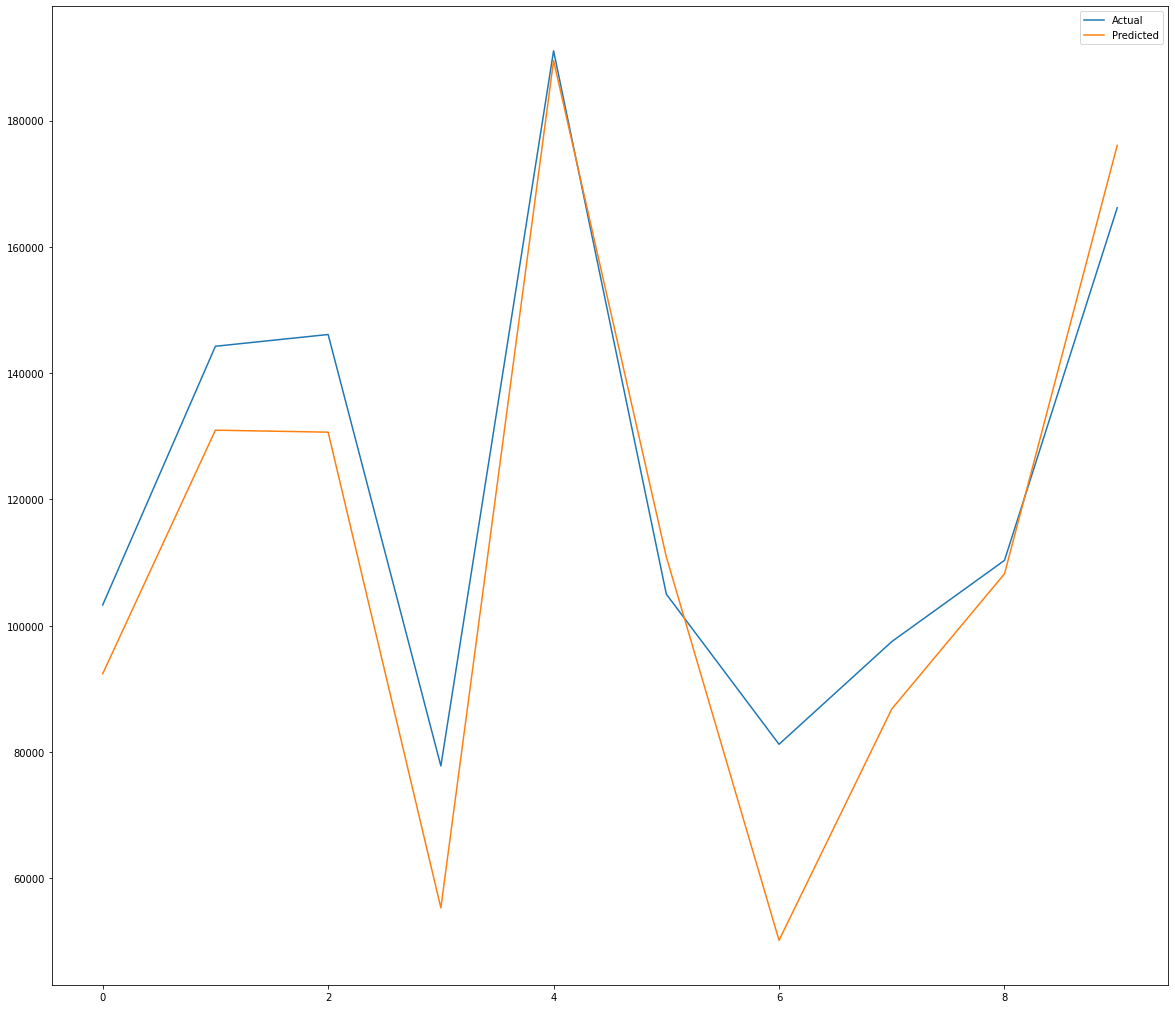

In [21]:
# Final visualization 
df.plot(figsize=(20,18), kind="bar")
df.plot(figsize= (20,18))
plt.show()

In [22]:
#R2SCORE 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8235262062096438